In [1]:
import random
from math import pi, cos, sin, sqrt, exp
import matplotlib.pyplot as plt
import numpy as np

# Trabajo Práctico 1 - Ejercicio 1 a 6

## Introducción

## Ejercicio 1

a) Implementar un Generador Congruencial Lineal (GCL) de módulo 2^32, multiplicador 1013904223, incremento de
1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

In [2]:
semilla = (99732 + 100687 + 99627 + 98625)//4
print(semilla)

99667


In [3]:
def gcl(estado_inicial):
    nuevo_estado = (1013904223 * estado_inicial + 1664525) % 2**32
    return nuevo_estado, nuevo_estado

b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1

In [4]:
def gcl_reduce(estado_inicial):
    nuevo_estado, semilla_nueva = gcl(estado_inicial)
    return nuevo_estado/2**32, semilla_nueva

c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

In [5]:
def numeros_random(muestra, generador, semilla):
    estado_actual = semilla
    resultado = []
    for i in range(muestra):
        numero_random, estado_actual = generador(estado_actual)
        resultado.append(numero_random)
    return resultado

In [6]:
muestra = 50000
resultado_gcl = numeros_random(muestra, gcl, semilla)
resultado_gcl_reduce = numeros_random(muestra, gcl_reduce, semilla)

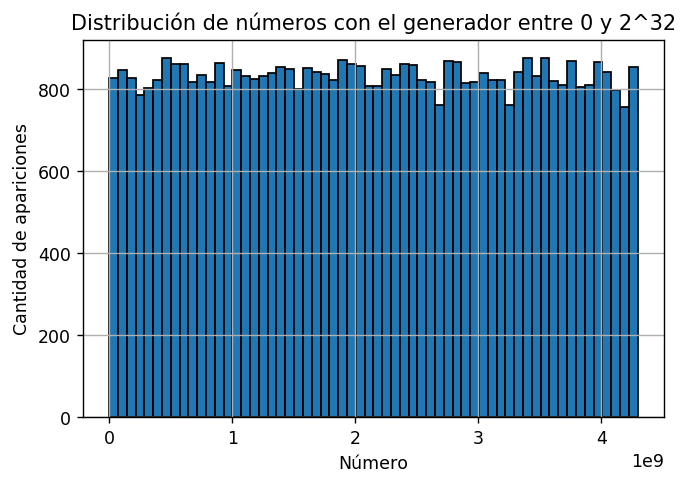

In [7]:
plt.figure(dpi=125)
plt.title('Distribución de números con el generador entre 0 y 2^32')
plt.hist(resultado_gcl, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.ylabel("Cantidad de apariciones")
plt.xlabel("Número")
plt.show()

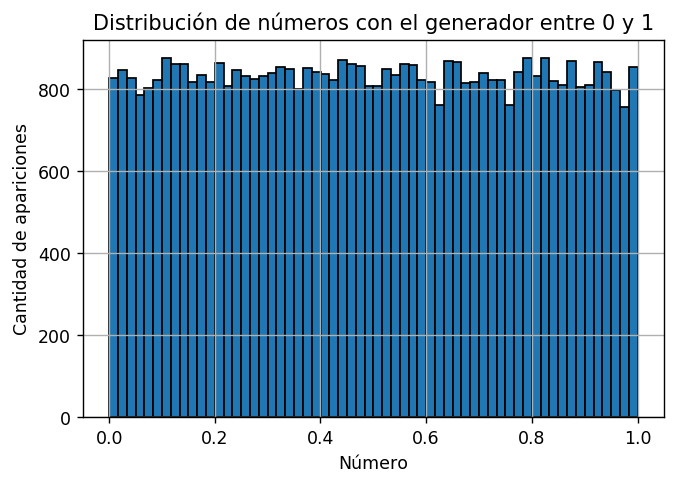

In [8]:
plt.figure(dpi=125)
plt.title('Distribución de números con el generador entre 0 y 1')
plt.hist(resultado_gcl_reduce, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.ylabel("Cantidad de apariciones")
plt.xlabel("Número")
plt.show()

d) Basándose en el generador implementado en el ítem a, implemente el generador aditivo propuesto por Mitchell y Moore

```
𝑥𝑖+1 = ( 𝑥𝑖−24 + 𝑥𝑖−55) 𝑚𝑜𝑑 2^24
Donde 𝑥0,𝑥1, … , 𝑥54 son números arbitrarios no todos iguales.
```

Para lograr implementar el generador propuesto por Mitchell y Moore se toman 55 estados iniciales a partir de los cuales se calcular los siguientes estados. 

In [9]:
def gen_mm(estados_previos):
    i = len(estados_previos)
    nuevo_estado = (estados_previos[i-24] + estados_previos[i-55])% 2**24
    estados_previos.append(nuevo_estado)
    return nuevo_estado, estados_previos

Los 55 estados iniciales se calcularon con el generador de numeros aleatorios calculado en el inciso a).

In [10]:
estados_iniciales = numeros_random(55, gcl, semilla)
resultado_gen_mm = numeros_random(muestra, gen_mm, estados_iniciales)

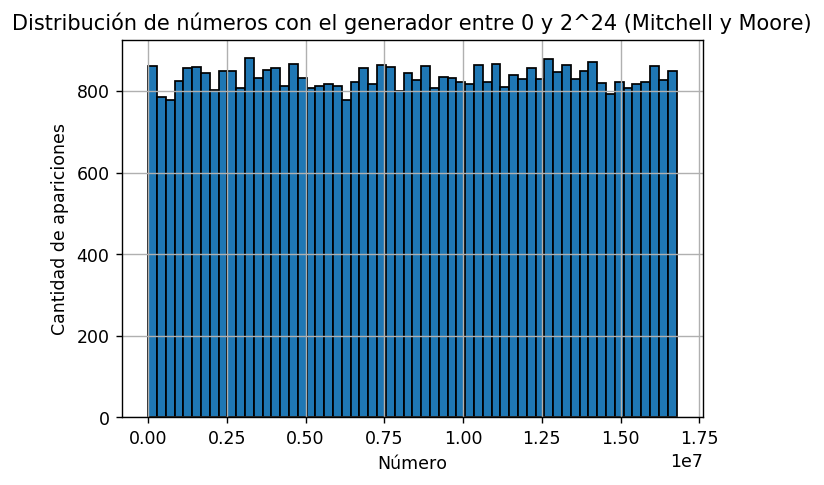

In [11]:
plt.figure(dpi=125)
plt.title('Distribución de números con el generador entre 0 y 2^24 (Mitchell y Moore)')
plt.hist(resultado_gen_mm, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.xlabel("Número")
plt.ylabel("Cantidad de apariciones")
plt.show()

## Ejercicio 2
Para cada uno de los generadores del ejercicio 1, proponer, y realizar, al menos 2 tests para evaluar su comportamiento. Evaluar e interpretar los resultados de cada uno para distintos tamaños de muestras.

Los tests que se realizaran a continuación para verificar que los generadores del ejercicio anterior se ajustan a una uniforme son:
- Test Chi Cuadrado
- Test de Kolmogorov Smirnov

Para ambos se utilizó un nivel de significacion de 1%

### Test 1 Chi2 con nivel de significacion 1%

El método consiste en comparar dos distribuciones de probabilidades.
Una obtenida luego de realizar un experimento, la que llamaremos
distribución observada, y una distribución que creemos que el experimento
sigue , la que consideraremos como distribución esperada.

La idea general es que cuanto más chica sea la diferencia entre los valores
obtenidos en cada una habrá más concordancia entre las dos.
Esa diferencia entre los valores obtenidos en el experimento y los valores
esperados es lo que vamos a medir con el estadístico Chi2

En nuestro caso la distribución observada son los numeros aleatorios generados con los distintos generadores y la distribución esperada es la uniforme.

Dado que estamos comparando contra una distribución continua para poder aplicar el método debemos discretizar la distribución

Pasos a seguir:
1) Elegir el nivel de significación con el que vamos a trabajar. Por lo general se utiliza 0,01 0,05 -> **Se eligió 1%**

2) Obtener el límite de la zona de aceptación/rechazo para k-1 grado de libertad -> **Grados de libertad: cantidad de baldes-1**

3) Calcular el estadístico con los datos del experimento en estudio -> **P(numero): 1/baldes**

4) Comparar el límite contra el estadístico obtenido

Para el test se plantearon las siguientes hipotesis buscando aceptar la nula:
- **H0**: La distribución es uniforme
- **H1**: La distribución no es uniforme

In [12]:
from scipy.stats import chi2

def chi_cuadrado(resultado, muestra, baldes): 
    frecuencias = np.histogram(resultado, bins=baldes)[0]

    D2 = sum([(fO - (1/baldes)*muestra)**2 for fO in frecuencias])/((1/baldes)*muestra)
    limiteSuperior = chi2.ppf(0.99, df=baldes-1)# Nivel de significacion 1%

    print("Limite superior: {:.2f} ".format(limiteSuperior))

    print("Estadistico: {:.2f} ".format(D2))

    if D2 <= limiteSuperior:
     print("El test acepta la hipotesis nula.")
    else:
     print("El test rechaza la hipótesis nula.")

**Generador GCL vs Uniforme**

In [13]:
# Uniforme gcl
chi_cuadrado(resultado_gcl, muestra, 10)

Limite superior: 21.67 
Estadistico: 5.63 
El test acepta la hipotesis nula.


**Generador GCL Reducido (entre 0 y 1) vs Uniforme**

In [14]:
# Uniforme gcl_reduce
chi_cuadrado(resultado_gen_mm, muestra, 10)

Limite superior: 21.67 
Estadistico: 8.41 
El test acepta la hipotesis nula.


**Generador Generador Mitchell y Moore vs Uniforme**

In [15]:
# Uniforme gen_mm
chi_cuadrado(resultado_gcl_reduce, muestra, 10)

Limite superior: 21.67 
Estadistico: 5.63 
El test acepta la hipotesis nula.


#### Resultados

Para los tres generadores aceptamos la hipotesis nula por lo tanto no podemos garantizar que la distribucion NO sea una uniforme en casa caso. Es decir, la distribución _podria_ ser uniforme.

### Test 2 Kolmogorov Smirnov con nivel de significacion 1%

El método se utiliza para variables aleatorias continuas.

Consiste en comparar dos distribuciones de probabilidad
acumulada, una elegida como hipótesis nula y otra generada de forma
empírica a partir de las observaciones realizadas a la variable que se
encuentra en estudio.

Para el test se plantearon las mismas hipotesis que para el test anterior buscando aceptar la nula:
- **H0**: La distribución es uniforme
- **H1**: La distribución no es uniforme

Pasos a seguir:
1) Elegir el nivel de significación con el que vamos a trabajar.Por lo general se utiliza 0,01 0,05 **-> Se eligió 1%**

2) Obtener el límite de la zona de aceptación/rechazo

3) Calcular el estadístico con los datos del experimento en estudio **-> F_obs(x) = cantidad de Xi <= x / n**

4) Comparar el límite contra el estadístico obtenido

In [16]:
from scipy.stats import uniform
from scipy.stats import kstest

def proba_acumulada(generados, x): # TODO: Optimizar
    suma_menores = 0
    for gen in generados:
        if gen <= x:
            suma_menores +=1
    return suma_menores/len(generados)

In [17]:
def ks_custom(resultado, muestra, max_rango = 1):
    max_dif = 0
    aux = 0
    for i in range(muestra):
        aux = abs( proba_acumulada(resultado, resultado[i]) - uniform.cdf(resultado[i], loc=0, scale=max_rango) )
        if aux > max_dif:
            max_dif = aux
    return max_dif

In [143]:
def evaluar_kstest(resultado, distribucion, args=None, alfa = 0.01):
    if not args:
        d, pvalor = kstest(resultado, distribucion)
    else:
        d, pvalor = kstest(resultado, distribucion, args=args)
    print(d)
    print(pvalor)
    # queremos confianza al 99%
    if pvalor < alfa:
        print("El test rechaza la hipotesis nula.")
    else:
        print("El test acepta la hipotesis nula.")

**Generador GCL vs Uniforme**

In [41]:
# Uniforme gcl
print(ks_custom(resultado_gcl, muestra, 2**32))

0.0032152038133889116


In [19]:
evaluar_kstest(resultado_gcl, 'uniform', args= (0, 2**32))

El test acepta la hipotesis nula.


**Generador GCL Reducido (entre 0 y 1) vs Uniforme**

In [27]:
# Uniforme gcl_reduce
print(ks_custom(resultado_gcl_reduce, muestra))

0.0032152038133889116


In [24]:
evaluar_kstest(resultado_gcl_reduce, 'uniform', args=(0,1))

El test acepta la hipotesis nula.


**Generador Generador Mitchell y Moore vs Uniforme**

In [29]:
# Uniforme gen_mm
print(ks_custom(resultado_gen_mm, muestra, 2**24))

0.002538340568542463


In [28]:
evaluar_kstest(resultado_gen_mm, 'uniform', args= (0, 2**24))

El test acepta la hipotesis nula.


#### Resultados

Para los tres generadores aceptamos la hipotesis nula por lo tanto no podemos garantizar que la distribucion NO sea una uniforme en casa caso. Es decir, la distribución _podria_ ser uniforme.

## Ejercicio 3
Se desea generar puntos al azar con distribución uniforme dentro del área descripta en el gráfico utilizando los siguientes
generadores de números al azar:

Para generar los puntos dentro del circulo se tomaron dos caminos. El primero implica forzar los puntos dentro del circulo, es decir generar numeros aleatorios y luego aplicarles el modulo del radio y luego corriendolo al centro del circulo, para esto se utilizó la función `point_in_circle`. El segundo camino consiste en el método de Aceptación y Rechazo que implica generar numeros aleatorios y verificar si se encuentran o no en el circulo (si cumplen o no con la distribución pedida) y solo en el caso en que se encuentren dentro agregarlo a la solucion, para esto se utilizó la funcion `is_point_in_circle`.

La diferencia entre ambos métodos es que en el primero todos los puntos que generamos los tenemos dentro del circulo entonces la muestra final es del tamaño que esperabamos pero en el segundo metodo depende de la distribucion del generados para la cantidad de puntos que esten dentro del circulo.
    

In [44]:
random.seed(semilla)

Para la generación de puntos dentro del circulo se hace uso de las coordenadas polares para obtener facilmente apartir de un angulo y un radio ubicar el punto dentro del circulo

In [45]:
def point_in_circle(c_x, c_y, r, gen):
    radio =  gen() % r
    theta = gen() * 2 * pi
    return c_x + cos(theta) * radio, c_y + sin(theta) * radio

Para verificar si un punto es valido o no, es decir si se encuentra dentro del circulo o utilizamos la ecuación:

$$(x - centro_x)^2 + (y - centro_y)^2 <= radio^2$$

En este caso:
- centro_x: 10
- centro_y: 10
- radio: 5

In [46]:
def is_point_in_circle(x, y, r, deltax, deltay):
    return (x - deltax)**2 + (y - deltay)**2 <= r**2

a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp

**Usando la uniforme de python y Forzando los puntos dentro del circulo**

In [47]:
# a
muestra = 100000
def python_random():
    result = []
    uniform = lambda: random.uniform(0,360)
    for i in range(muestra):
        result.append(point_in_circle(10,10,5,uniform))
    return result

In [48]:
result_python = python_random()

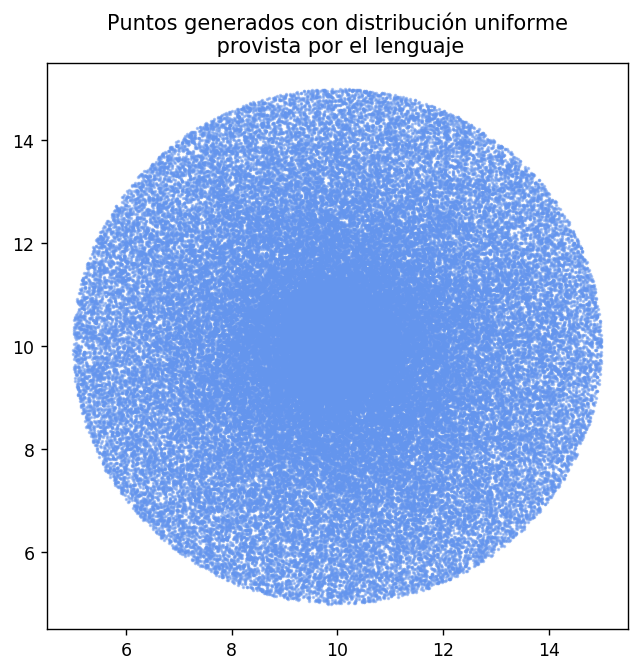

In [62]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_python], [p[1] for p in result_python], color="cornflowerblue", alpha=0.5, s=1)
plt.title("Puntos generados con distribución uniforme\n provista por el lenguaje")
plt.show()

**Usando la uniforme de Python y Chequeando si el punto esta dentro del circulo**

In [51]:
# a
muestra = 100000
def python_random_2():
    result = []
    rejected_points = []
    for i in range(muestra):
        x, y = random.uniform(5, 15), random.uniform(5, 15)
        if is_point_in_circle(x, y, 5, 10, 10):
            result.append((x, y))
        else:
            rejected_points.append((x, y))
    return result, rejected_points

In [52]:
result_python_2, rejected_points = python_random_2()

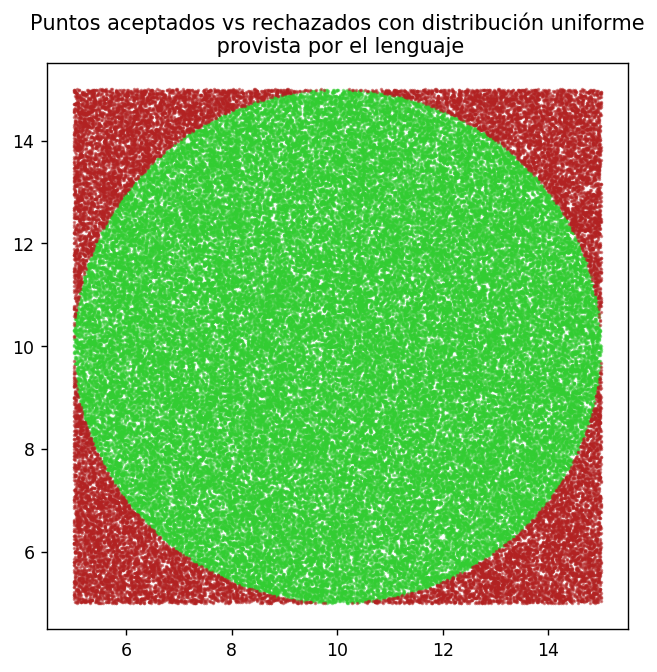

In [64]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_python_2], [p[1] for p in result_python_2], color="limegreen", alpha=0.5, s=1)
plt.scatter([p[0] for p in rejected_points], [p[1] for p in rejected_points], color="firebrick", alpha=0.5, s=1)
plt.title("Puntos aceptados vs rechazados con distribución uniforme\n provista por el lenguaje")
plt.show()

b) Alguno de los generadores de números al azar implementados con el algoritmo del ejercicio 1.

**Usando nuestro generador entre (0,1) y Forzando los puntos dentro del circulo**

In [25]:
# b
muestra = 100000

def gcl_random():
    result = []
    global estado_actual
    estado_actual = semilla
    def gen_propio():
        global estado_actual
        numero_random, estado_actual = gcl_reduce(estado_actual)
        return (numero_random%360)*5
    for i in range(muestra):
        result.append(point_in_circle(10,10,5,gen_propio))
    return result

In [26]:
result_gcl = gcl_random()

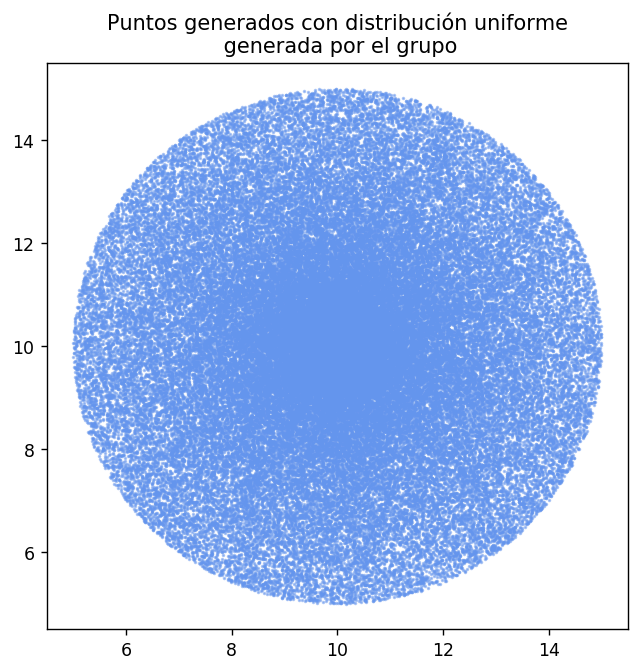

In [27]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_gcl], [p[1] for p in result_gcl], color="cornflowerblue", alpha=0.5, s=1)
plt.title("Puntos generados con distribución uniforme\n generada por el grupo")
plt.show()

**Usando nuestro generador entre (0,1) y Chequeando si el punto esta dentro del circulo**

In [57]:
# b
muestra = 100000

def gcl_random_2():
    result = []
    rejected_points = []
    estado_actual = semilla            
    for i in range(muestra):
        x, estado_actual = gcl_reduce(estado_actual)
        x = x*10+5
        y, estado_actual = gcl_reduce(estado_actual)
        y = y*10+5
        if is_point_in_circle(x, y, 5, 10, 10):
            result.append((x, y))
        else:
            rejected_points.append((x, y))
    return result, rejected_points

In [58]:
result_gcl_2, rejected_points_gcl = gcl_random_2()

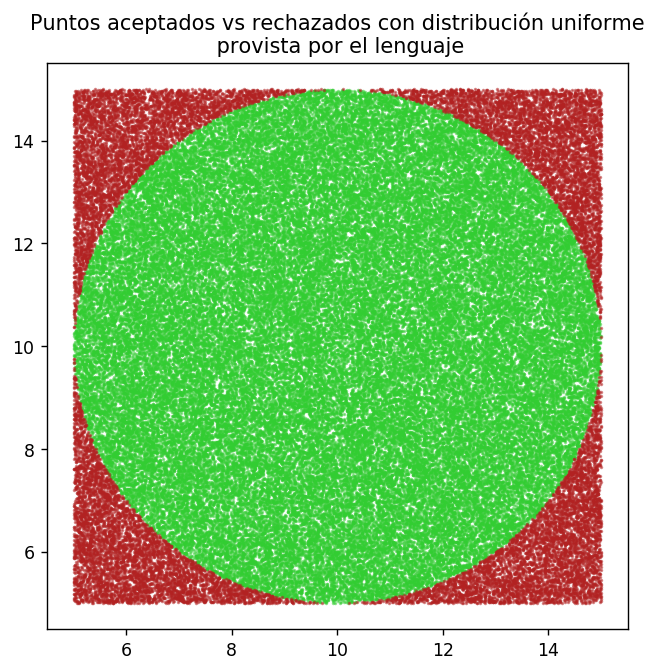

In [63]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_gcl_2], [p[1] for p in result_gcl_2], color="limegreen", alpha=0.5, s=1)
plt.scatter([p[0] for p in rejected_points_gcl], [p[1] for p in rejected_points_gcl], color="firebrick", alpha=0.5, s=1)
plt.title("Puntos aceptados vs rechazados con distribución uniforme\n provista por el lenguaje")
plt.show()

c) Calcule el factor de rendimiento del método.

Para poder evaluar los factores de rendimiento se utilizo la solucion que generaba numeros y se fijaba si estaban o no dentro del ciruclo para evaluar cuantos de los puntos generados fueron rechazados con respecto al tamaño de la muestra.

**Factor de rendimiento usando la funcion de Python**

In [60]:
# c 
r_uniform = len(result_python_2) / muestra
print(r_uniform)

0.7858


**Factor de rendimiento usando el generador**

In [61]:
# c 
r_gcl = len(result_gcl_2) / muestra
print(r_gcl)

0.78695


#### Resultados

A partir de los factores de rendimiento podemos concluir que nuestro generador tuvo un mejor rendimiento que el provisto por el lenguaje dado que menos puntos fueron rechazados entonces significa que es "más" uniforme nuestra distribución.

## Ejercicio 4
Para la siguiente densidad de probabilidad, se pide:

![](densidad_ej4.png)

a) Definir la función de densidad de probabilidad.

$$ f_x(x)=  \left\{
\begin{array}{ll}
      \frac{1}{15}x - \frac{1}{15} & x\geq1 \land x<4 \\
      -\frac{2}{45}x + \frac{17}{45} & x\geq4 \land x<6 \\
      \frac{1}{9} & x\geq6 \land x<9 \\
      \frac{-1}{9}x +\frac{10}{9} & x\geq9 \land x<10 \\
      0 & otro caso \\
\end{array} 
\right. $$ 

In [65]:
def funcion_densidad(x):
    if x>=1 and x<4:
        return 1/15*(x - 1)
    elif x>=4 and x<6:
        return 1/45*(17 - 2*x)
    elif x>=6 and x<9:
        return 1/9
    elif x>=9 and x<10:
        return 1/9 * (10 - x)
    return 0

b) Calcular y graficar la función de probabilidad acumulada y su inversa.

En un primer lugar se calcula la función de probabilidad acumulada:


$$F_x(x)=\int_{-\infty}^{x} f_x(x)\ dx= \left\{
\begin{array}{ll}
      0 & x<1 \\
      \frac{1}{30}*(x-1)^2 & x\geq1 \land x<4 \\
      \frac{3}{10} + \frac{1}{45}(- x^2 + 17x - 52) & x\geq4 \land x<6 \\
      \frac{11}{18} + \frac{x}{9} - \frac{2}{3} & x\geq6 \land x<9 \\
      \frac{17}{18} + \frac{1}{18}*(-x^2 + 20x - 99) & x\geq9 \land x<10 \\
      1 & x\geq10
\end{array} 
\right. $$

In [121]:
def probabilidad_acumulada(x):
    if x<=1:
        return 0
    elif x>=1 and x<4:
        return 1/30*(x - 1)**2
    elif x>=4 and x<6:
        return 3/10 + 1/45*(- x**2 + 17*x - 52)
    elif x>=6 and x<9:
        return 11/18 + x/9 - 2/3
    elif x>=9 and x<10:
        return 17/18 + 1/18*(- x**2 + 20*x - 99)
    return 1

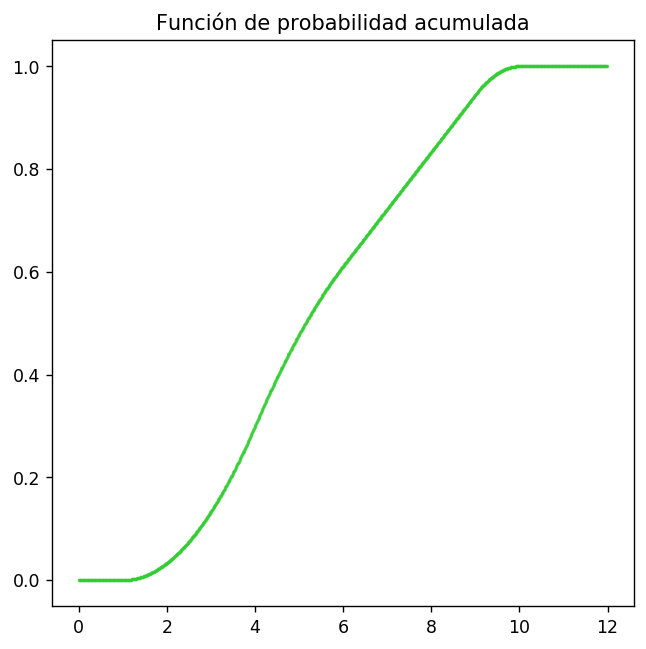

In [122]:
points = np.arange(0, 12, 0.01)
nums = []

for x in points:
    nums.append(probabilidad_acumulada(x))

plt.figure(dpi=125, figsize=(6, 6))
plt.scatter(points, [num for num in nums], color="limegreen", alpha=0.5, s=1)
plt.title("Función de probabilidad acumulada")
plt.show()

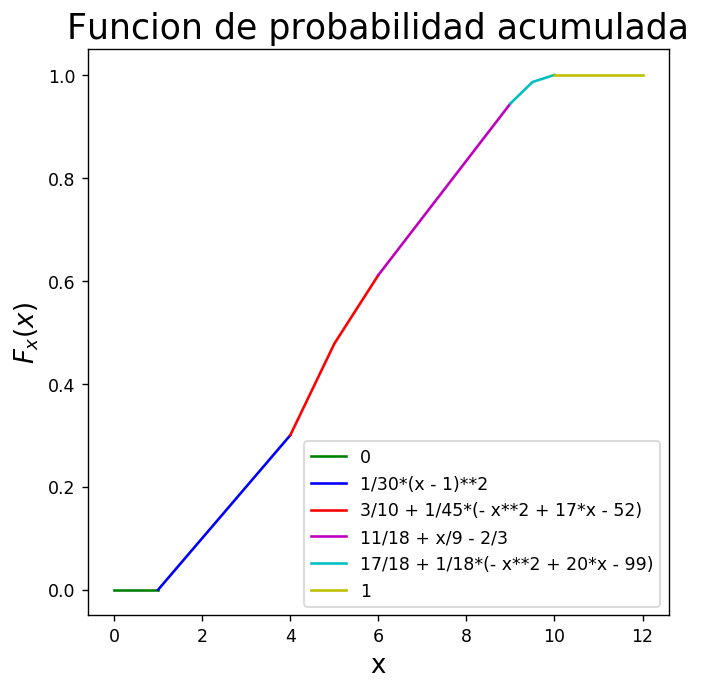

In [123]:
x1 = np.linspace(0, 1, num=3)
x2 = np.linspace(1, 4, num=2)
x3 = np.linspace(4, 6, num=3)
x4 = np.linspace(6, 9, num=3)
x5 = np.linspace(9, 10, num=3)
x6 = np.linspace(10, 12, num=3)
 
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x1, [0 for x in x1], 'g', label='0')
plt.plot(x2, [probabilidad_acumulada(x) for x in x2], 'b', label='1/30*(x - 1)**2')
plt.plot(x3, [probabilidad_acumulada(x) for x in x3], 'r', label='3/10 + 1/45*(- x**2 + 17*x - 52)')
plt.plot(x4, [probabilidad_acumulada(x) for x in x4], 'm', label='11/18 + x/9 - 2/3')
plt.plot(x5, [probabilidad_acumulada(x) for x in x5], 'c', label='17/18 + 1/18*(- x**2 + 20*x - 99)')
plt.plot(x6, [probabilidad_acumulada(x) for x in x6], 'y', label='1')
 
    
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.title("Funcion de probabilidad acumulada", size =20)
plt.xlabel("x", size=15)
plt.ylabel('$F_x(x)$', size=15)
plt.legend()
plt.show()

Luego se calcula la inversa de la función de probabilidad acumulada:

Si $F_X(x) = P(X \leq x) = y$ => $F_X^{-1}(y) = x$

Se reemplaza el valor de los extremos en los distintos intervalos para obtener los extremos de la función inversa y se halla el valor de la función en los mismos.

$$F_X^{-1}(y)= \left\{
\begin{array}{ll}
      \sqrt{30y} + 1 & y\geq0 \land y<\frac{3}{10} \\
      \frac{17}{2} - \frac{3}{2} * \sqrt{-20y+15} & y\geq\frac{3}{10} \land y<\frac{11}{18} \\
      9y + \frac{1}{2} & y\geq \frac{11}{18} \land y<\frac{17}{18} \\
      10 - 3\sqrt{-2y +2} & y\geq\frac{17}{18} \land y<1 \\
\end{array} 
\right. $$

In [124]:
def inversa_probabilidad_acumulada(y):
    if y>=0 and y<3/10:
        return sqrt(30*y) + 1
    elif y>=3/10 and y<11/18:
        return 17/2 - 3/2*sqrt(-20*y+15)
    elif y>=11/18 and y<17/18:
        return 9*y + 1/2
    elif y>=17/18 and y<1:
        return 10 - 3*sqrt(-2*y+2)

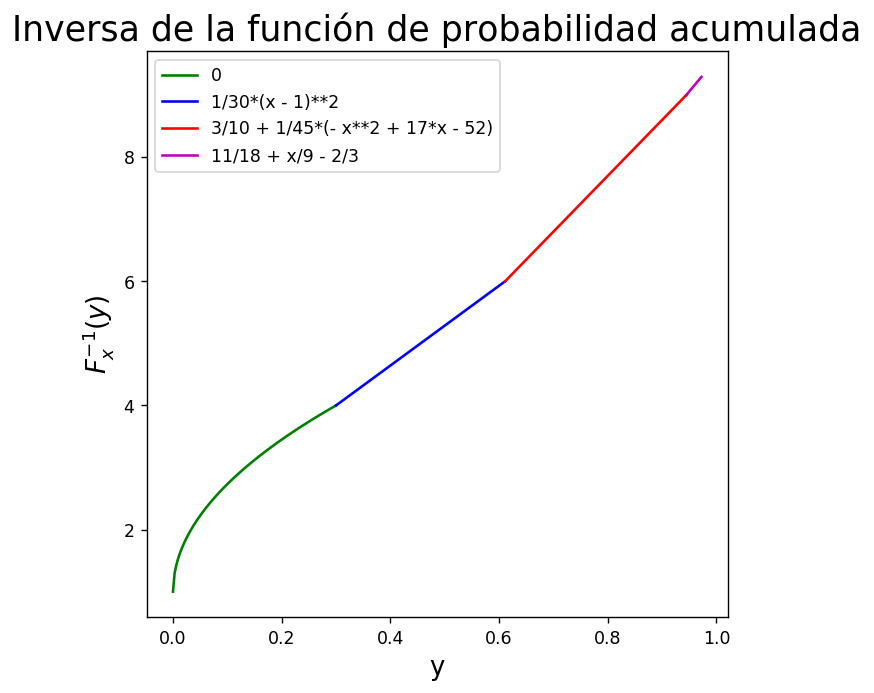

In [125]:
x1 = np.linspace(0, 3/10, num=100)
x2 = np.linspace(3/10, 11/18, num=2)
x3 = np.linspace(11/18, 17/18, num=3)
x4 = np.linspace(17/18, 1, num=3)
 
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x1, [inversa_probabilidad_acumulada(x) for x in x1], 'g', label='0')
plt.plot(x2, [inversa_probabilidad_acumulada(x) for x in x2], 'b', label='1/30*(x - 1)**2')
plt.plot(x3, [inversa_probabilidad_acumulada(x) for x in x3], 'r', label='3/10 + 1/45*(- x**2 + 17*x - 52)')
plt.plot(x4, [inversa_probabilidad_acumulada(x) for x in x4], 'm', label='11/18 + x/9 - 2/3')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.title("Inversa de la función de probabilidad acumulada", size =20)
plt.xlabel("y", size=15);
plt.ylabel('$F^{-1}_x(y)$', size=15);
plt.legend();
plt.show()

c) Utilizando el generador de números aleatorios implementado en el ítem b del ejercicio 1, genere números al azar
con la distribución propuesta.

Para generar numeros aleatorios con la distribucion propuesta utilizamos el generados de numeros entre 0 y 1 del ejercicio 1 y utilizamos el Metodo de la Transformada inversa el cual consiste en:

**Método de la Transformada Inversa**

Para generar muestras de una variable aleatoria X,
cuya función de densidad sea $f_X(x)$:
1) Generar U distribuida uniformemente en [0,1] **-> Generador GLC_reduce**

2) Aplicar la transformación $X = F^{-1}_X(U)$ **-> calculada en el inciso b)**

In [145]:
muestra = 100000
resultado_gcl_reduce = numeros_random(muestra, gcl_reduce, semilla)
generados_dist = []
for y in resultado_gcl_reduce:
    x = inversa_probabilidad_acumulada(y)
    generados_dist.append(x)

d) Realice los gráficos que considere necesarios para mostrar la distribución de números al azar generados.

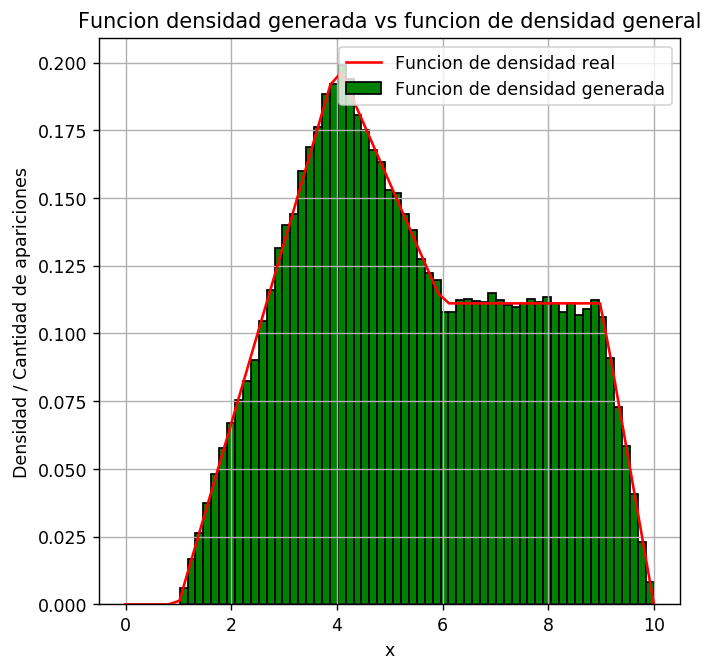

In [153]:
points = np.linspace(0,10)
plt.figure(dpi=125, figsize=(6, 6))
plt.title('Funcion densidad generada vs funcion de densidad general')
plt.plot(points, [funcion_densidad(x) for x in points], color = 'red', label='Funcion de densidad real')
plt.hist(generados_dist, density=True, bins=60, alpha=1, color='green', edgecolor = 'black', linewidth=1, label='Funcion de densidad generada')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("Densidad / Cantidad de apariciones")
plt.legend()
plt.show()

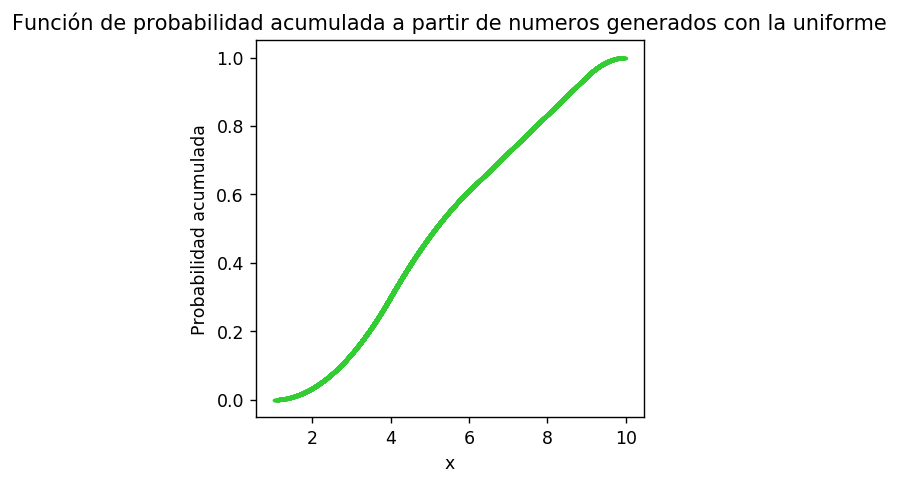

In [154]:
plt.figure(dpi=125, figsize=(4, 4))
plt.scatter(generados_dist, resultado_gcl_reduce, color="limegreen", alpha=0.5, s=1)
plt.title("Función de probabilidad acumulada a partir de numeros generados con la uniforme")
plt.xlabel("x")
plt.ylabel("Probabilidad acumulada")
plt.show()

Para demostrar que la solucion encontrada se ajusta a la funcion de densidad propuesta por la catedra aplicamos un test de Kolmogorov Smirnov con un nivel de significacion de 1%.

Planteamos las hipotesis:
- **H0**: La solucion se ajusta a la densidad $f_x(x)$
- **H1**: La solucion no se ajusta a la densidad $f_x(x)$

In [157]:
from scipy.stats import ks_2samp
points = np.linspace(0,10)

d, pvalor = ks_2samp(resultado_gcl_reduce, [funcion_densidad(x) for x in points])

if pvalor < 0.01:
    print("El test acepta la hipotesis nula")
else:
    print("El test rechaza la hipotesis nula")

El test acepta la hipotesis nula


Como aceptamos la hipotesis nula no podemos garantizar que la solucion NO se ajusta a la densidad.

## Ejercicio 5

1. Implemente un método para generar variables aleatorias con distribución normal con media 15 y desvío 3.
1. Muestre gráficamente la distribución que siguen los números pseudoaleatorios generados.
1. Realice 2 tests de los explicados en la materia para verificar si los números generados siguen la distribución pedida(evalué los resultados para distintos tamaños de muestra).

### Superposicion

Intentamos sumar muchas uniformes para llegar a la distribucion normal pedida pero no conseguimos resultados exitosos.

In [158]:
cant_dist = 6
muestra = 50000
media = 0.5
desvio = 1/12

result = [0 for i in range(muestra)]
for i in range(cant_dist):
    gcl_res = numeros_random(muestra, gcl_reduce, semilla*i)
    for i in range(muestra): 
        result[i]+=gcl_res[i]
        
result_norm_standard = list(map(lambda x: (x - cant_dist*media)/sqrt(cant_dist*desvio), result))
result_norm_15_3 = list(map(lambda x: 9*x + 15, result_norm_standard))

No handles with labels found to put in legend.


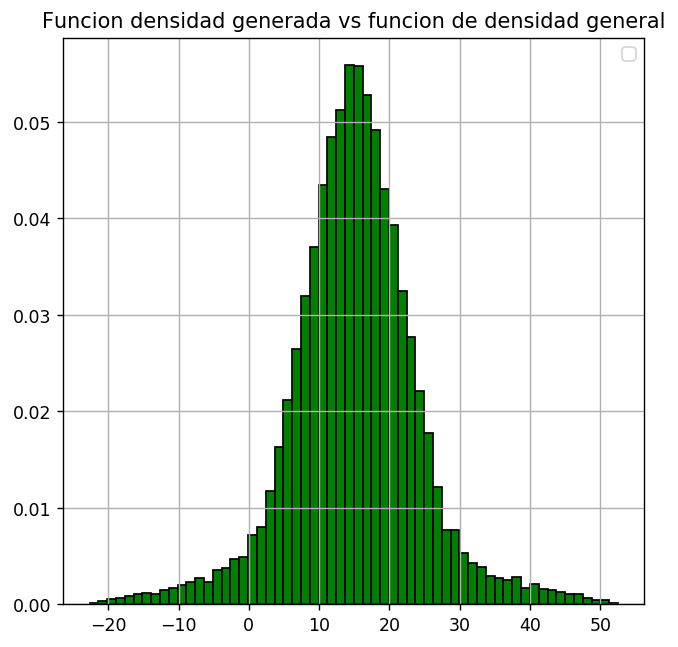

In [160]:
plt.figure(dpi=125, figsize=(6, 6))
plt.title('Funcion densidad generada vs funcion de densidad general')
plt.hist(result_norm_15_3, density=True, bins=60, alpha=1, color='green', edgecolor = 'black', linewidth=1)
plt.grid(True)
plt.legend()
plt.show()

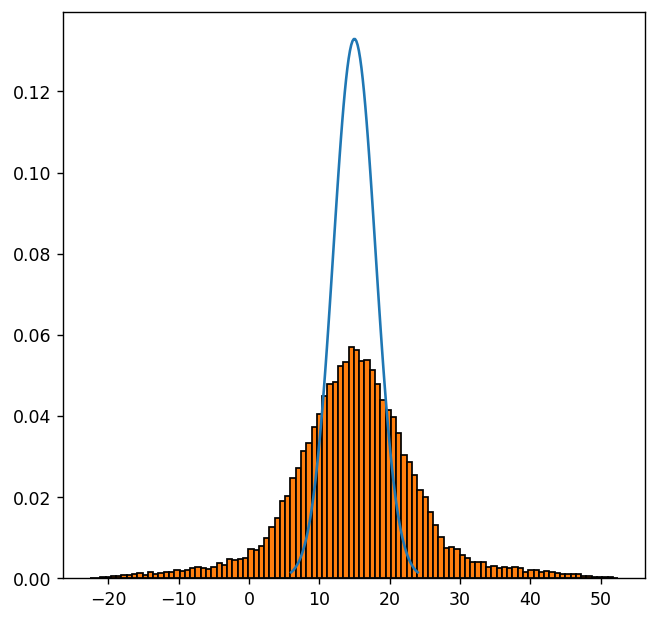

In [180]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

mu = 15
variance = 3
sigma = variance
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(result_norm_15_3, bins=100, alpha=1, edgecolor='black', linewidth=1, density=True)
plt.show()

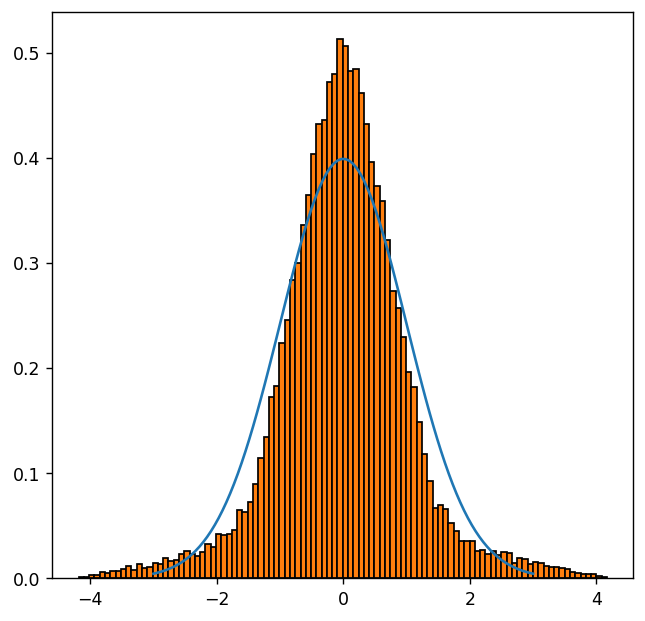

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = variance
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(result_norm_standard, bins=100, alpha=1, edgecolor='black', linewidth=1, density=True)
plt.show()

### Aceptacion y rechazo
Para generar muestras de una variable aleatoria Z, cuya función de densidad sea fX(x):

1- Generar X1 distribuida uniformemente en [0,a]

2- Generar Y distribuida uniformemente en [0,b]

3- Si Y <= fX(X1), entonces Z = X1 , sino volver al punto 1.

**Usando dos uniformes**

In [201]:
from scipy.stats import norm

def generar_normal_15_3_uniformes(muestra):
    aceptados = []
    rechazados = []
    for i in range(muestra):
        x1 = random.uniform(0,30)
        y = random.uniform(0, 0.5)
        if y < norm.pdf(x1, 15,3):
            aceptados.append(x1)
        else:
            rechazados.append(x1)
    return aceptados, rechazados

In [202]:
muestra_uni = 200000
aceptados_uni, rechazados = generar_normal_15_3_uniformes(muestra_uni)

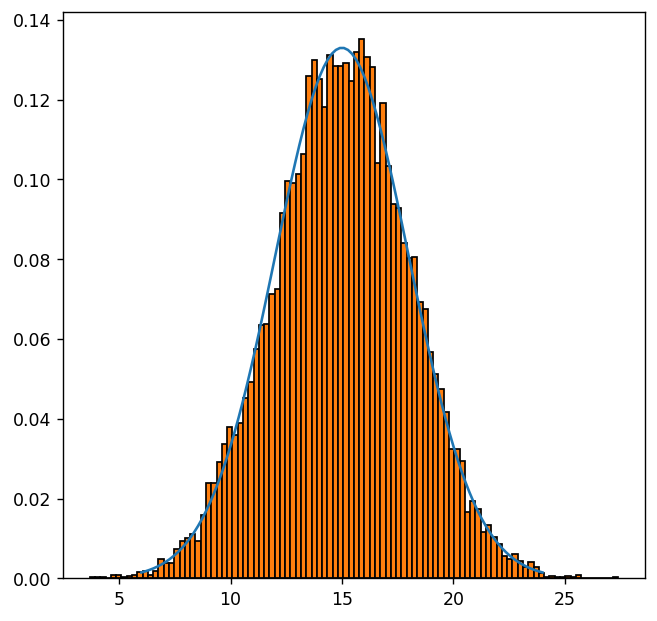

In [203]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 15
variance = 3
sigma = variance
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(aceptados_uni, bins=100, alpha=1, edgecolor='black', linewidth=1, density=True)
plt.show()

**Usando una exponencial y una uniforme**

In [206]:
from scipy.stats import norm

def generar_normal_15_3_exponencial(muestra):
    aceptados = []
    rechazados = []
    for i in range(muestra):
        x1 = random.uniform(5, 25)
        y = np.random.exponential(scale = 1, size = 1)[0]
        if y < norm.pdf(x1, 15,3):
            aceptados.append(x1)
        else:
            rechazados.append(x1)
    return aceptados, rechazados

In [207]:
muestra_exp = 200000
aceptados_exp, rechazados = generar_normal_15_3_exponencial(muestra_exp)

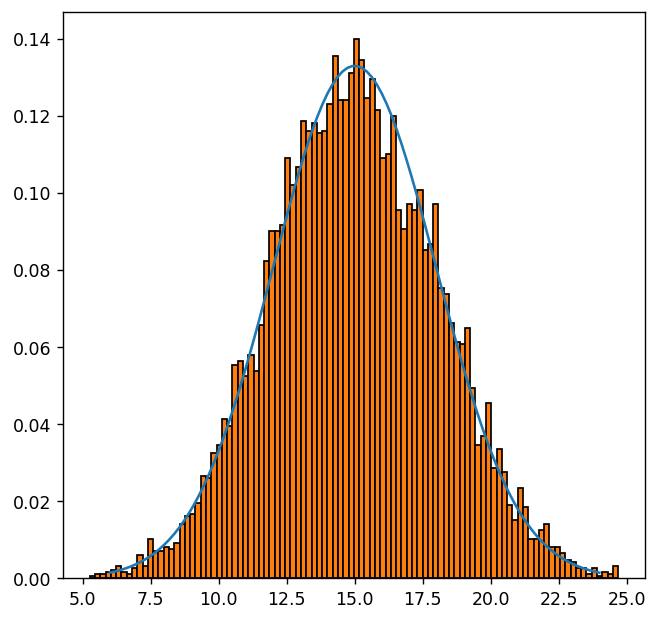

In [208]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 15
variance = 3
sigma = variance
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(aceptados_exp, bins=100, alpha=1, edgecolor='black', linewidth=1, density=True)
plt.show()

### Test 1: Chi cuadrado, nivel de significacion 1%

Hipotesis:
- **H0**: La distribucion es normal(15,3)
- **H1**: La distribucion no es normal(15,3)

In [209]:
from scipy.stats import chi2, norm

def chi_cuadrado_normal(resultado, muestra, baldes): 
    frecuencias, extremos = np.histogram(resultado, bins=baldes)
    
    esperado = [muestra*(norm.cdf(extremos[i], 15, 3)- norm.cdf(extremos[i-1], 15, 3)) for i in range(1,len(extremos))]
    
    D2 = sum([(frecuencias[i] - esperado[i])**2/esperado[i] for i in range(len(frecuencias))])
    limiteSuperior = chi2.ppf(0.99, df=baldes-1)# Nivel de significacion 1%

    print("Limite superior: {:.2f} ".format(limiteSuperior))

    print("Estadistico: {:.2f} ".format(D2))

    if D2 <= limiteSuperior:
     print("El test acepta la hipotesis nula.")
    else:
     print("El test rechaza la hipótesis nula")

Tuve que poner baldes=muestra porque sino no me daba, nose si es un error de como hice el test o que se hace asi con continuas

In [205]:
chi_cuadrado_normal(aceptados_uni, muestra_uni, muestra_uni)

Limite superior: 201473.25 
Estadistico: 189050.43 
El test acepta la hipotesis nula.


In [210]:
chi_cuadrado_normal(aceptados_uni, muestra_exp, muestra_exp)

Limite superior: 201473.25 
Estadistico: 189050.43 
El test acepta la hipotesis nula.


### Test 2: Kolvmogorov Smirnov

Hipotesis:
- **H0**: La distribucion es normal(15,3)
- **H1**: La distribucion no es normal(15,3)

In [176]:
evaluar_kstest(aceptados_uni, 'norm', args= (15, 3))

0.00802257498735548
0.3516873025196563
El test acepta la hipotesis nula.


In [177]:
evaluar_kstest(aceptados_exp, 'norm', args= (15, 3))

0.009527245687105723
0.35094499292909986
El test acepta la hipotesis nula.


## Ejercicio 6

En el trabajo práctico se incluye un archivo con números pseudoaleatorios.

Determine, y justifique, a cuál de las siguientes distribuciones pertenecen los números suministrados:
- Uniforme 

$$ f_x(x)=  \left\{
\begin{array}{ll}
      \frac{1}{10} & 25\leq x \leq 35 \\
      0 & otro \\
\end{array} 
\right. $$ 

- Exponencial

$$ f_x(x)=  \left\{
\begin{array}{ll}
      \frac{1}{30}e^{-\frac{1}{30}x} & x\geq0 \\
      0 & otro \\
\end{array} 
\right. $$ 

- Normal Media 30 Desvío 5

In [178]:
numeros = []
with open("fiuba_simulacion_2021_1c_tp_1_random_numbers.txt", mode='r') as numeros_random:
    numeros_leidos = numeros_random.readlines()        
    numeros_filtrados = filter(lambda numero: numero != '\n', numeros_leidos)
    numeros = list(map(lambda numero: float(numero[:-1]), numeros_filtrados))

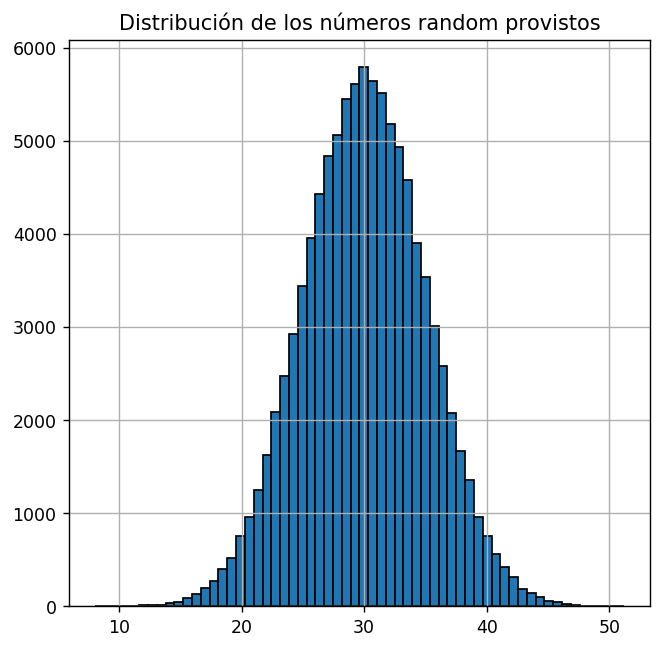

In [184]:
plt.figure(dpi=125, figsize=(6, 6))
plt.title('Distribución de los números random provistos')
plt.hist(numeros, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

Por el gráfico se puede observar que se trata de una normal pero se verificará analíticamente si se trata de la normal con la media y desvío provistos por el enunciado.

Para verificar a cuál de las distribuciones pertenecen los números suministrados se utilizará el test de Kolmogorov–Smirnov

### Test Kolmogorov Smirnov



**Uniforme(25, 35)**

Hipotesis para la uniforme:
- **H0**: La distribucion es uniforme(25,35)
- **H1**: La distribucion no es normal(25,35)

In [185]:
evaluar_kstest(numeros, 'uniform', args= (25, 35))

0.576957142857143
0.0
El test rechaza la hipotesis nula.


Se puede afirmar que **no** es una uniforme(25, 35)

**Exponencial(1/30)**

Hipotesis para la exponencial:
- **H0**: La distribucion es exponencial(1/30)
- **H1**: La distribucion no es exponencial(1/30)

In [186]:
evaluar_kstest(numeros, 'expon', args= (0, 1/30))

1.0
0.0
El test rechaza la hipotesis nula.


Se puede afirmar que **no** es una exponencial(1/30).

**Normal(30, 5)**

Hipotesis para la normal:
- **H0**: La distribucion es normal(30, 5)
- **H1**: La distribucion no es normal(30, 5)

In [188]:
evaluar_kstest(numeros, 'norm', args= (30, 5))

0.0034093457053632203
0.19543711620943577
El test acepta la hipotesis nula.


No se puede afirmar que no es una normal(30, 5) por lo tanto es probable que lo sea.

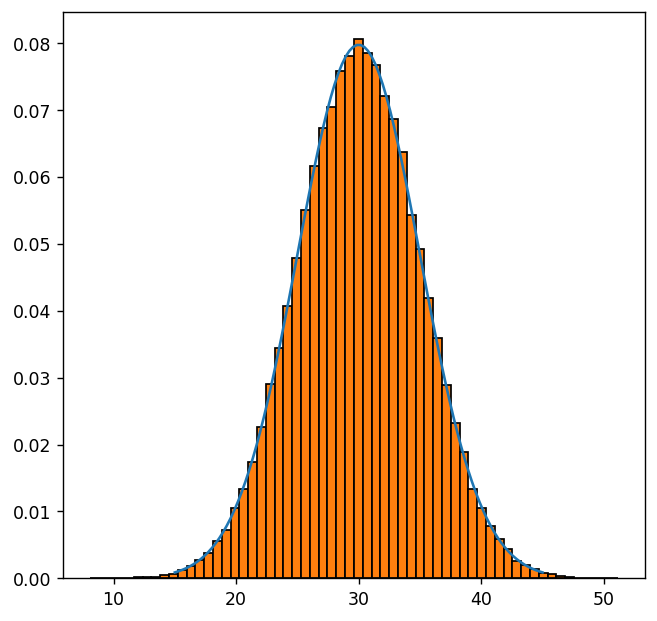

In [190]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 30
variance = 5
sigma = variance
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(numeros, bins=60, alpha=1, edgecolor='black', linewidth=1, density=True)
plt.show()